In [1]:
people = [
    {"name": "Alice", "age": 30},
    {"name": "Bob", "age": 25},
    {"name": "Charlie", "age": 35}
]

In [5]:
for p, data in enumerate(people):
    print(f"Person {p}: {data['name']} is {data['age']} years old.")

Person 0: Alice is 30 years old.
Person 1: Bob is 25 years old.
Person 2: Charlie is 35 years old.


In [12]:
#function that returns the items which attribute "key" match the value "value", given the dictionary "data"
def filter_by_key(data, key, value):
    return [item for item in data if item.get(key) == value]


In [13]:
filter_by_key(people, "name2", "Bob")

[]

In [16]:
def generate_Perm(data):
    if not data:
        return [""]
    perms = []
    for i, char in enumerate(data):
        for perm in generate_Perm(data[:i] + data[i+1:]):
            perms.append(char + perm)
    return perms


In [17]:
generate_Perm("abc")

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

In [18]:
def generate_Perm_DP(data):
    from itertools import permutations
    return [''.join(p) for p in permutations(data)]

In [55]:
from itertools import permutations, combinations, groupby
data = 'abc'
print([''.join(p) for p in permutations(data, 3)])
print([''.join(p) for p in combinations(data, 3)])


['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
['abc']


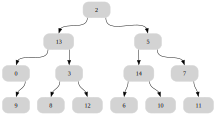

In [177]:
from binarytree import Node, build, tree
from graphviz import Source
from IPython.display import display

t = tree()

# Generate a graphviz.Digraph object
# Arguments to this method are passed into Digraph.__init__
graph = t.graphviz()

graph.attr(size="3,3") 
display(Source(graph.source))

In [68]:
data = "This is so cool!"
s = [c.lower() for c in data if c.isalpha()]
r = s[:]
r.reverse()
print(s)
print(r)

['t', 'h', 'i', 's', 'i', 's', 's', 'o', 'c', 'o', 'o', 'l']
['l', 'o', 'o', 'c', 'o', 's', 's', 'i', 's', 'i', 'h', 't']


In [70]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


In [85]:
tree = {
    "value": "Root",
    "left": {
        "value": "A",
        "left": {"value": "A1", "left": None, "right": None},
        "right": {"value": "A2", "left": None, "right": None}
    },
    "right": {
        "value": "B",
        "left": {"value": "B1", "left": None, "right": None},
        "right": {"value": "B2", "left": None, "right": None}
    }
}

In [86]:
def build_tree(data):
    if not data:
        return None
    node = Node(data['value'])
    node.left = build_tree(data['left']) if 'left' in data else None
    node.right = build_tree(data['right']) if 'right' in data else None
    return node

root = build_tree(tree)


In [87]:
def pre_order(node, level=0):
    if node is not None:
        print(' ' * 2 * level + '->', node.value)        
        pre_order(node.left, level + 1)
        pre_order(node.right, level + 1)
        
pre_order(root)


-> Root
  -> A
    -> A1
    -> A2
  -> B
    -> B1
    -> B2


In [88]:
def in_order(node, level=0):
    if node is not None:
        in_order(node.left, level + 1)
        print(' ' * 2 * level + '->', node.value)        
        in_order(node.right, level + 1)
        
in_order(root)

    -> A1
  -> A
    -> A2
-> Root
    -> B1
  -> B
    -> B2


In [89]:
def post_order(node, level=0):
    if node is not None:
        post_order(node.left, level + 1)
        post_order(node.right, level + 1)
        print(' ' * 2 * level + '->', node.value)

post_order(root)

    -> A1
    -> A2
  -> A
    -> B1
    -> B2
  -> B
-> Root


In [93]:
binary_tree_array = ['R', 'A', 'B', 'C', 'D', 'E', 'F', None, None, None, None, None, None, 'G']

def left_child_index(index):
    return 2 * index + 1

def right_child_index(index):
    return 2 * index + 2

def get_data(index):
    if 0 <= index < len(binary_tree_array):
        return binary_tree_array[index]
    return None

right_child = right_child_index(0)
left_child_of_right_child = left_child_index(right_child)
data = get_data(left_child_of_right_child)

print("root.right.left.data:", data)

root.right.left.data: E


In [100]:
def count_islands(grid):
    if not grid or not grid[0]:
        return 0
    
    rows, cols = len(grid), len(grid[0])
    visited = [[False] * cols for _ in range(rows)]
    island_count = 0
    
    def dfs(r, c):
        if (r < 0 or r >= rows or c < 0 or c >= cols or 
            visited[r][c] or grid[r][c] == '0'):
            return
        
        visited[r][c] = True
        # Explore all 4 directions
        dfs(r + 1, c)
        dfs(r - 1, c)
        dfs(r, c + 1)
        dfs(r, c - 1)
    
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == '1' and not visited[i][j]:
                dfs(i, j)
                island_count += 1
    
    return island_count

In [102]:
data = [['1', '1', '1', '1', '0'], ['1', '1', '0', '1', '0'], ['1', '1', '0', '0', '0'], ['0', '0', '0', '0', '0']]
x = count_islands(data)
print(x)

1


In [97]:
def knapsack_01(capacity, items):
    n = len(items)
    if n == 0 or capacity == 0:
        return 0

    # dp[i][w] = maximum value with first i items and weight limit w
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        weight, value = items[i-1]
        for w in range(capacity + 1):
            # Don't take current item
            dp[i][w] = dp[i-1][w]

            # Take current item if it fits
            if weight <= w:
                dp[i][w] = max(dp[i][w], dp[i-1][w-weight] + value)

    return dp[n][capacity]

In [103]:
items = [[2, 0, 0, 3], [0, 1, 1, 0], [0, 0, 0, 0]]
x = knapsack_01(3, items)
print(x)

ValueError: too many values to unpack (expected 2)

In [129]:

def tokenize(expr: str):
    """Tokenize mathematical expression into operators, operands, and parentheses."""
    tokens = []
    i = 0
    
    while i < len(expr):
        char = expr[i]
        
        # Skip whitespace
        if char.isspace():
            i += 1
            continue
            
        # Handle multi-character identifiers (variables like 'abc', 'x1')
        if char.isalpha():
            token = ""
            while i < len(expr) and expr[i].isalnum():
                token += expr[i]
                i += 1
            tokens.append(token)
            
        # Handle multi-digit numbers
        elif char.isdigit():
            token = ""
            while i < len(expr) and expr[i].isdigit():
                token += expr[i]
                i += 1
            tokens.append(token)
            
        # Handle operators and parentheses
        elif char in "+-*/()":
            tokens.append(char)
            i += 1
            
        else:
            # Skip unknown characters or raise error
            i += 1
    
    return tokens


In [145]:
def foo(tokens):
    stack = []
    output = []
    for token in tokens:
        if token.isdigit():
            output.append(int(token))
        elif token.isalpha():
            output.append(token)
        elif token in "+-*/":
            while (stack and stack[-1] in "+-*/" and
                   (token in "+-" or stack[-1] in "*/")):
                output.append(stack.pop())
            stack.append(token)
        elif token == '(':
            stack.append(token)
        elif token == ')':
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            stack.pop()
    while stack:
        output.append(stack.pop())
    return output


In [147]:
tokens = tokenize("1*(2+3)")
output = foo(tokens)
print("Output:", output)


Output: [1, 2, 3, '+', '*']


In [141]:
tokens = tokenize("1+2*3")
output = foo(tokens)
print("Output:", output)

Output: [1, 2, 3, '*', '+']


In [ ]:
def foo(tokens):
    output = []
    stack = []
    for t in tokens:
        if t.isalpha() or t.isdigit():
            output.append(t)
        elif t in "+-*/":
            # if operator, pop from stack to output based on precedence
            while(stack and stack[-1] in "+-*/" and
                   (t in "+-" or stack[-1] in "*/")):
                output.append(stack.pop())
            stack.append(t)
        elif t == '(':
            stack.append(t)
        elif t == ')':
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            stack.pop()
    while stack:
        output.append(stack.pop())
    return output


In [149]:
foo(tokenize("1*(2+3)"))

[1, 2, 3, '+', '*']

In [153]:
def twoSum(nums, target):
    peer = {}
    for i, n in enumerate(nums):
        peer_val = target-n
        if (peer_val) in peer:
            return [peer[target-n], i]
        peer[n] = i
    return []

data = [2, 7, 11, 15, 20]
target = 27
result = twoSum(data, target)
print(result)

[1, 4]


In [155]:
def foo(n):
    s = str(n)
    return s == s[::-1]

print(foo(12321))  # True
print(foo(12345))  # False
print(foo(-1234321))  # True

True
False
False


In [ ]:
def romanToInt(s):
    roman_to_dec = {
        'I': 1, 'V': 5, 'X': 10, 'L': 50, b'C': 100, 'D': 500, 'M': 1000
    }
    ans = previous = 0
    for char in s[::-1]:
        val = roman_to_dec[char]
        if val < previous:
            ans -= val
        else:
            ans += val
        previous = val
    return ans

print(romanToInt("MMXXIV"))  # 1994

2024


In [ ]:
def isValid(s):
    stack = []
    peer = { ')':'(', ']':'[', '}':'{' }
    for c in s:
        if c not in peer:
            # according to the test cases that can only be an open symbol
            stack.append(c)
        elif not stack:
            # if stack is empty and we encounter a closing symbol
            return False
        elif stack.pop() != peer[c]:
            # must match the opening peer symbol
            return False
    return len(stack) == 0

print(isValid("()"))  # True
print(isValid("()[]{}"))  # True
print(isValid("(]"))  # False

True
True
False


In [178]:
def bfs(root):
    from collections import deque
    def get_neighbors(node):
        neighbors = []
        if node.left:
            neighbors.append(node.left)
        if node.right:
            neighbors.append(node.right)
        return neighbors
    queue = deque([root])
    visited = set([root])
    while len(queue) > 0:
        node = queue.popleft()
        for neighbor in get_neighbors(node):
            if neighbor in visited:
                continue
            queue.append(neighbor)
            visited.add(neighbor)


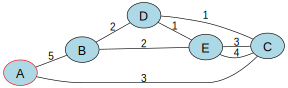

In [218]:
from graphviz import Source
from IPython.display import display

# Prepare the data to illustrate the Djikstra algorithm: we have 5 nodes A, B, C, D, E that are connected, with weights, as follows:
graph = Source("""
    graph G {
        size="4,3";  # width, height in inches
        rankdir=LR;  # left to right layout
        bgcolor="white";                   
        node [fillcolor="lightblue", style="filled", fontsize=20, fontname="Helvetica"]; 
        edge [fontname="Helvetica", fontsize=16];
                
        A [color="red", style="filled"];
                                
        A -- B [label="5"];
        A -- C [label="3"];
        B -- D [label="2"];
        C -- D [label="1"];
        C -- E [label="4"];
        D -- E [label="1"];
        E -- B [label="2"];
        E -- C [label="3"];
    }
""", format='png')
# set the size of the graph
display(graph)
